In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EJERCICIO CON DATA SET DE MERCADEO BANCARIO


## Importar librerias

In [154]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
import sklearn.metrics as metrics

# Módulo necesario para trabajar Árboles
from sklearn.tree import DecisionTreeClassifier

## Importar Data Set

In [3]:
df =pd.DataFrame()
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/mercadeo_bancario.csv")
df.head(10)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1
5,30,management,divorced,preschool,6,yes,yes,no,499476,75,1,cellular,jul,tue,68,90,0,1553,0
6,37,blue-collar,married,preschool,6,no,yes,no,86520,0,5,cellular,may,thu,204,66,0,442,0
7,39,blue-collar,divorced,tecnical_school,4,no,yes,no,176081,0,1,cellular,may,fri,191,51,0,495,0
8,36,admin.,married,university.degree,6,no,no,no,0,0,3,cellular,jun,mon,174,0,1,1097,1
9,27,blue-collar,single,preschool,3,no,yes,no,323709,0,1,cellular,apr,thu,191,33,1,414,0


## Conociendo los Datos

In [4]:
df.describe()

,edad,total_hijos,valor_prestamo,dias_ultimo_pago,tarjetas_credito,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.984680,149706.676751,0.336409,2.497524,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,2.583405,166028.840792,4.478984,1.703683,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,1.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,4.000000,81778.500000,0.000000,2.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,6.000000,290938.500000,0.000000,4.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,8.000000,499992.000000,90.000000,5.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


In [5]:
df.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

In [7]:
df.shape

(41188, 19)

### Limpiando el Data Set y transformando valores

In [8]:
df.keys()

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados', 'si_no'],
      dtype='object')

In [9]:
#Solo dejamos las columnas que necesitamos
df = df.drop(columns=['credito_sin_pago','prestamo_vivienda','prestamo_personal','valor_prestamo','dias_ultimo_pago', 'contacto',
                      'mes','dia_semana','duracion_ultimo_contacto','dias_ultimo_contacto','anterior_contacto','numero_empleados'])

In [126]:
df.keys()

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'tarjetas_credito', 'si_no'],
      dtype='object')

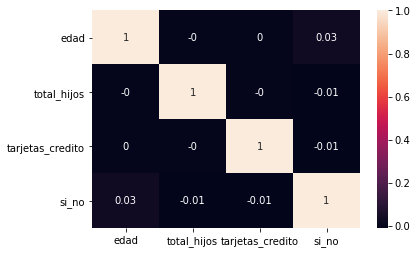

In [10]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [11]:
df.isna().sum()

edad                0
trabajo             0
estado_civil        0
educacion           0
total_hijos         0
tarjetas_credito    0
si_no               0
dtype: int64

In [12]:
print(f"EDA:\n{df['edad']}\n EDU:\n{df['educacion']}\n ESCL:\n{df['estado_civil ']}\n TRC:\n{df['tarjetas_credito']}\n"+
 f"TRB:\n{df['trabajo']}\n TH:\n{df['total_hijos']}\n SI_NO:\n{df['si_no']}")

EDA:
0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: edad, Length: 41188, dtype: int64
 EDU:
0                   preschool
1                     unknown
2           university.degree
3        Technological_school
4                   preschool
                 ...         
41183    Technological_school
41184               preschool
41185       university.degree
41186     professional.course
41187    Technological_school
Name: educacion, Length: 41188, dtype: object
 ESCL:
0        married
1        married
2         single
3        married
4        married
          ...   
41183    married
41184    married
41185     single
41186    married
41187     single
Name: estado_civil , Length: 41188, dtype: object
 TRC:
0        5
1        0
2        0
3        4
4        4
        ..
41183    0
41184    4
41185    3
41186    4
41187    3
Name: tarjetas_credito, Length: 41188, dtype: int64
TRB:
0        blue

### Los valores que tienen texto serán convertidos a numericos

#### Primero se conocen que posibles campos alojan para así mismo transformarlos

In [13]:
# Primero debo conocer que campos alojan las columnas para poder transformarlos
df['educacion'].unique()

array(['preschool', 'unknown', 'university.degree',
       'Technological_school', 'tecnical_school', 'professional.course',
       'primary_school', 'illiterate'], dtype=object)

In [14]:
df['estado_civil '].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [15]:
df['trabajo'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [16]:
# Transformando Educacion
valores_cambio = {'educacion':{'preschool':1, 'unknown':2, 'university.degree':3,
                               'Technological_school':4, 'tecnical_school':5, 
                               'professional.course':6, 'primary_school':7, 
                               'illiterate':7}}
df.replace(valores_cambio, inplace=True)
df['educacion']

0        1
1        2
2        3
3        4
4        1
        ..
41183    4
41184    1
41185    3
41186    6
41187    4
Name: educacion, Length: 41188, dtype: int64

In [17]:
# Transformando Estado Civil
valores_cambio = {'estado_civil ':{'married':1, 'single':2, 'divorced':3,'unknown':4}}
df.replace(valores_cambio, inplace=True)
df['estado_civil ']

0        1
1        1
2        2
3        1
4        1
        ..
41183    1
41184    1
41185    2
41186    1
41187    2
Name: estado_civil , Length: 41188, dtype: int64

In [18]:
# Transformando trabajo
#['blue-collar', 'technician', 'management', 'services', 'retired',
#       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
#      'self-employed', 'unknown', 'student'], dtype=object)
valores_cambio = {'trabajo':{'blue-collar':1, 'technician':2, 'management':3,'services':4,
                              'retired':5, 'admin.':6, 'housemaid':7, 'unemployed':8,'entrepreneur':9,
                              'self-employed':10, 'unknown':11, 'student':12}}
df.replace(valores_cambio, inplace=True)
df['trabajo']

0         1
1         2
2         3
3         4
4         5
         ..
41183     5
41184     7
41185     6
41186     2
41187    12
Name: trabajo, Length: 41188, dtype: int64

### Se Intenta de nuevo graficar la matriz de correlación 

In [46]:
df['edad'] = pd.to_numeric(df['edad'],errors='coerce')
df['trabajo'] = pd.to_numeric(df['trabajo'],errors='coerce')
df['educacion'] = pd.to_numeric(df['educacion'],errors='coerce')
df['total_hijos'] = pd.to_numeric(df['total_hijos'],errors='coerce')
df['estado_civil '] = pd.to_numeric(df['estado_civil '],errors='coerce')
df['si_no'] = pd.to_numeric(df['si_no'],errors='coerce')


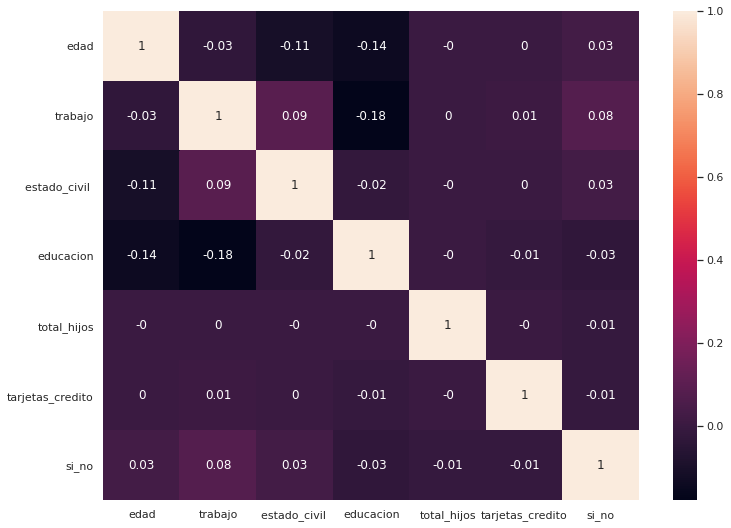

In [47]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

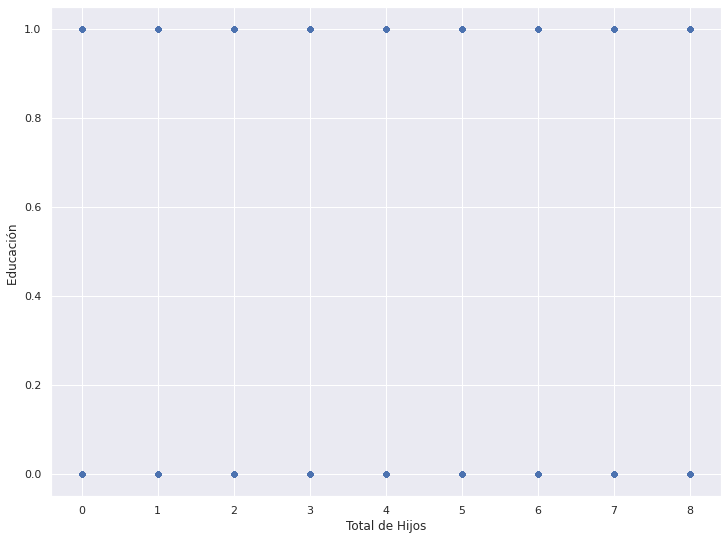

In [48]:
X = df['total_hijos']
y = df['si_no']
plt.scatter(X,y, s=20,alpha=1)
plt.xlabel('Total de Hijos')
plt.ylabel('Educación ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


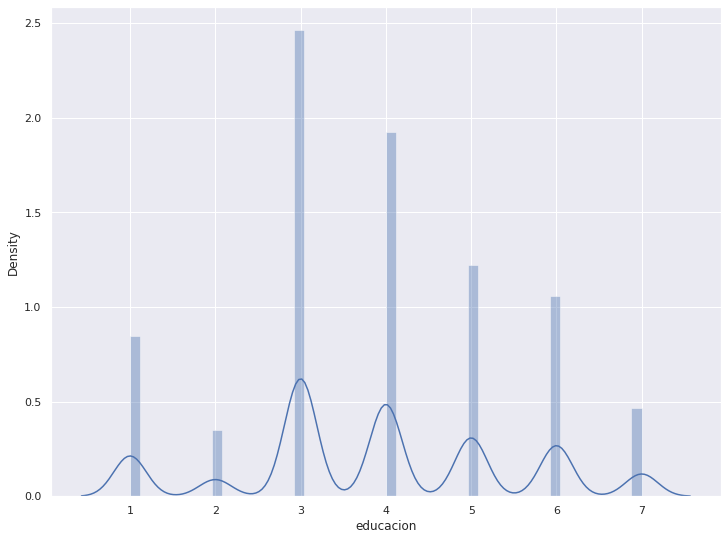

In [49]:
sns.set(rc={'figure.figsize':(12,9)})# Tamaño del Gráfico
sns.distplot(df['educacion'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


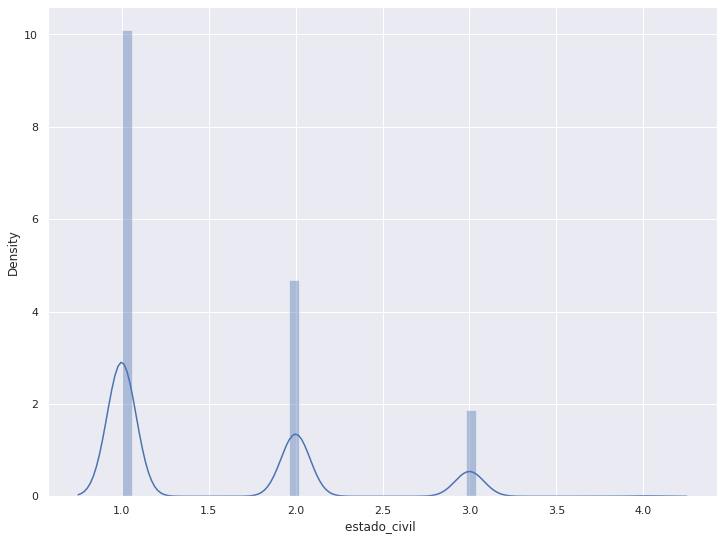

In [50]:
sns.set(rc={'figure.figsize':(12,9)})# Tamaño del Gráfico
sns.distplot(df['estado_civil '])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


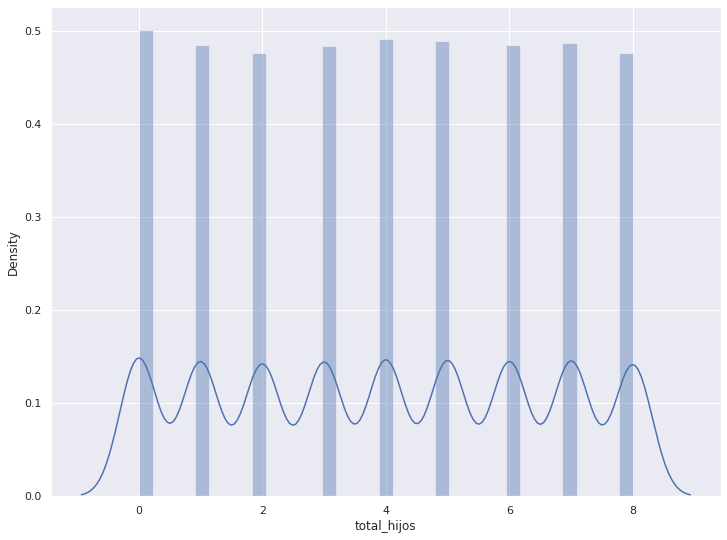

In [51]:
sns.set(rc={'figure.figsize':(12,9)})# Tamaño del Gráfico
sns.distplot(df['total_hijos'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


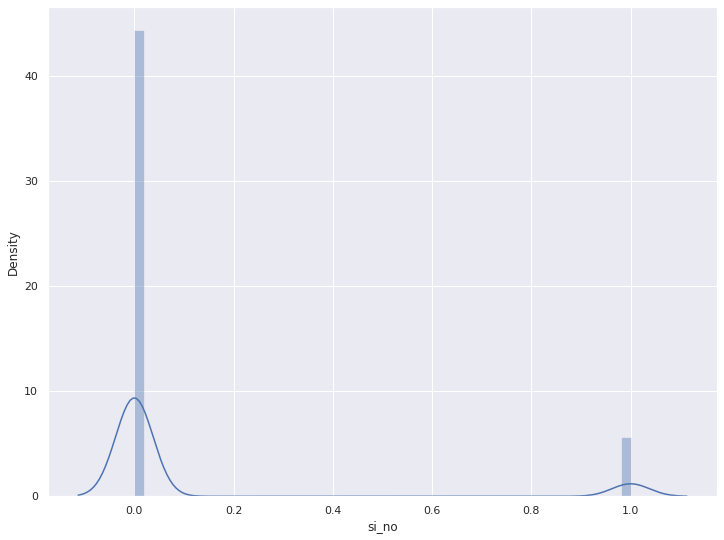

In [52]:
sns.set(rc={'figure.figsize':(12,9)})# Tamaño del Gráfico
sns.distplot(df['si_no'])
plt.show()

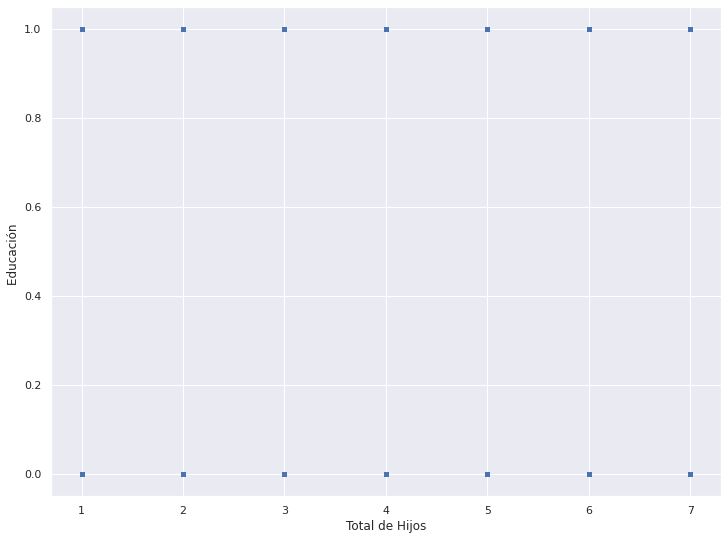

In [53]:
X = df['educacion']
y = df['si_no']
plt.scatter(X,y, s=15,alpha=0.5)
plt.xlabel('Total de Hijos')
plt.ylabel('Educación ')
plt.show()

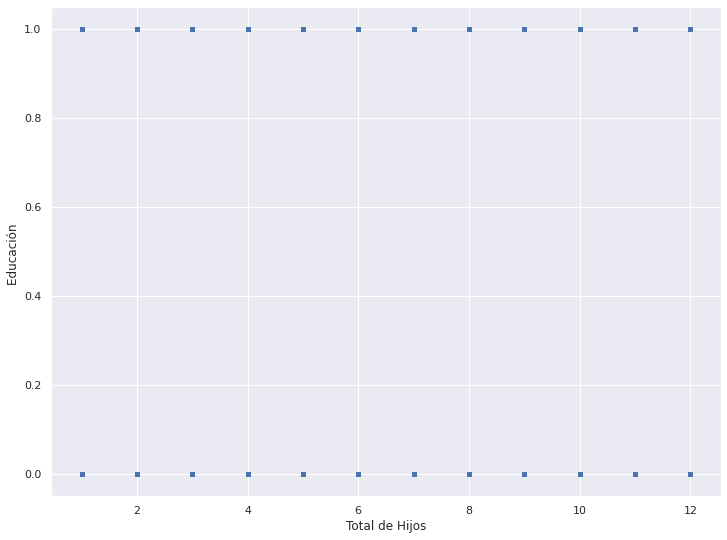

In [54]:
X = df['trabajo']
y = df['si_no']
plt.scatter(X,y, s=15,alpha=0.5)
plt.xlabel('Total de Hijos')
plt.ylabel('Educación ')
plt.show()

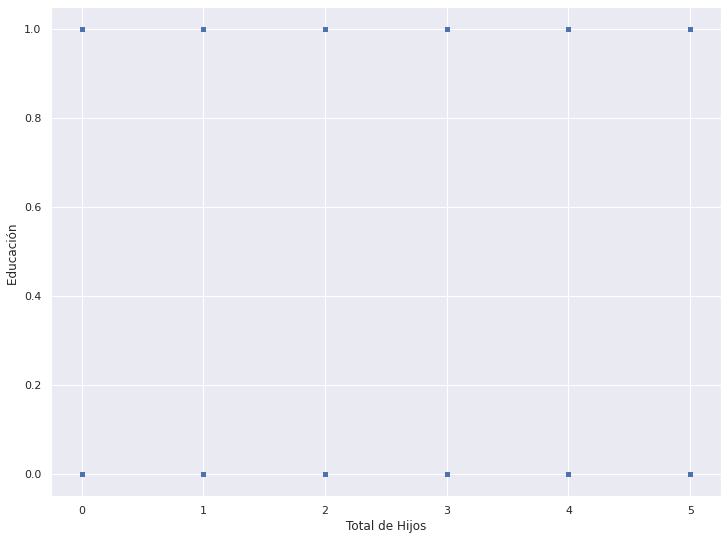

In [55]:
X = df['tarjetas_credito']
y = df['si_no']
plt.scatter(X,y, s=15,alpha=0.5)
plt.xlabel('Total de Hijos')
plt.ylabel('Educación ')
plt.show()

In [114]:
#df['edad'] df['educacion'] df['estado_civil ']  df['tarjetas_credito'] df['trabajo'] df['total_hijos'] df['si_no']
df2 = pd.DataFrame(df)
# print(df2)
x = np.array(df2.drop('si_no', axis=1))
#En Y colocaremos el resultado del examen (1 / 0 ) (aprobado / reprobado)
y= np.array(df['si_no'])
print(X)
print(y)

0        5
1        0
2        0
3        4
4        4
        ..
41183    0
41184    4
41185    3
41186    4
41187    3
Name: tarjetas_credito, Length: 41188, dtype: int64
[0 0 1 ... 0 0 0]


In [137]:
df['si_no'].unique()

array([0, 1])

In [191]:
#separamos los datos 25%(test) y 75%(train)
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
#Si deseamos cambiar la proporción solo debemos agregar la variable test_size=0.x 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=29,test_size=0.30)
# 7 y 50


In [192]:
#REGRESIÓN LOGÍSTICA
regresion_logistica = LogisticRegression()



In [193]:
# DATOS PARA EL ÁRBOL DE DESICIÓN
x_train, x_test, y_train, y_test = train_test_split(df2, df['si_no'], random_state=42)

In [194]:
#ÁRBOL DE DESICIÓN
arbol_clasifi = DecisionTreeClassifier(max_depth=4, random_state=30)

In [195]:
# SE ENTRENA LA REGRESIÓN LOGÍSTICA
regresion_logistica.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
# SE ENTRENA EL ÁRBOL DE DESICIÓN
arbol_clasifi.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

In [198]:
#usaremos el 20% de los datos para probar el modelo
#ejecutamos la predicción con datos de prueba (x_test)
y_prediccion = regresion_logistica.predict(X_test)

#PREDICCIÓN DEL ÁRBOL DE DESICIÓN
#tomamos la información del primer registro (X_test)

print(x_test.iloc[0])
print(y_test.iloc[0])
#le pasamos esos datos al algoritmo
arbol_clasifi.predict(x_test.iloc[0].values.reshape(1, -1))

arbol_clasifi.predict(x_test[0:20])

edad                30
trabajo             10
estado_civil         2
educacion            3
total_hijos          5
tarjetas_credito     4
si_no                0
Name: 32884, dtype: int64
0


array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [199]:
#comparamos los datos de predicción (y_prediccion) VS los datos de prueba (y_test)
exactitud = metrics.accuracy_score(Y_test, y_prediccion)
print("exactitud_percentaje= "+str(100 * exactitud))

exactitud_percentaje= 89.277332685927


In [200]:
# CALCULAMOS PRESICIÓN DE ÁRBOl
accuary = arbol_clasifi.score(x_test, y_test)
print(accuary)

1.0


## Gráfica del árbol

In [202]:
#Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
      # 'tarjetas_credito', 'si_no'],
    #  dtype='object')
class_names_list = list(['0','1'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol_clasifi, feature_names= df.keys(), class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')


True

In [203]:
print(x_train)

       edad  trabajo  estado_civil   ...  total_hijos  tarjetas_credito  si_no
549      35        1              1  ...            3                 1      0
1974     31        2              1  ...            8                 3      1
20992    48        9              1  ...            8                 1      0
1730     39        4              3  ...            5                 3      0
26913    41        2              1  ...            3                 3      0
...     ...      ...            ...  ...          ...               ...    ...
6265     42        3              1  ...            3                 0      0
11284    34        6              2  ...            1                 4      1
38158    30        4              2  ...            1                 1      1
860      27        2              2  ...            0                 2      0
15795    40        6              1  ...            4                 1      0

[30891 rows x 7 columns]


In [204]:
importances = pd.DataFrame({'feature':x_train.columns, 'importance':np.round(arbol_clasifi.feature_importances_,3)})
#importances = pd.DataFrame({'feature': , x_train.columns:np.round(arbol_clasifi.feature_importances_,3)})
print(importances)

            feature  importance
0              edad         0.0
1           trabajo         0.0
2     estado_civil          0.0
3         educacion         0.0
4       total_hijos         0.0
5  tarjetas_credito         0.0
6             si_no         1.0


In [205]:
importances = importances.sort_values('importance', ascending=False)
importances.head(10)

,feature,importance
6,si_no,1.0
0,edad,0.0
1,trabajo,0.0
2,estado_civil,0.0
3,educacion,0.0
4,total_hijos,0.0
5,tarjetas_credito,0.0


### MEJORANDO EL ÁRBOL DE DESICIÓN

In [206]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    
    arbol_clasifi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasifi.fit(x_train, y_train)
    score = arbol_clasifi.score(x_test, y_test)
    accuracy.append(score)

### GRAFICAMOS

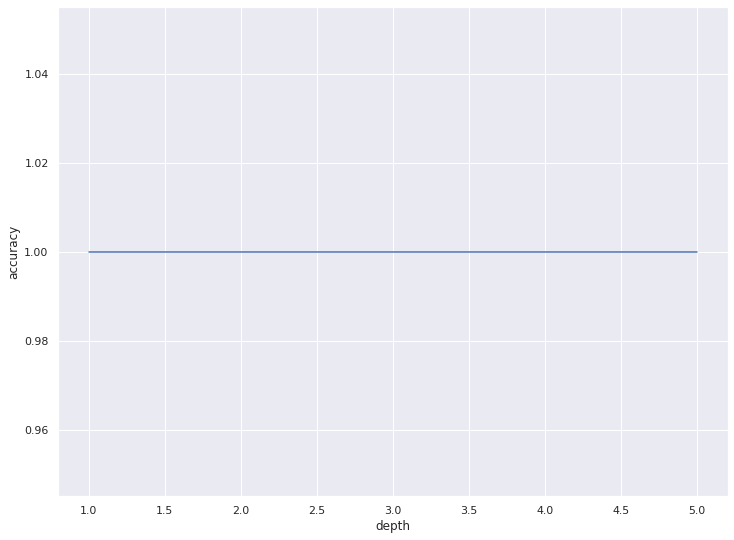

In [207]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()